### Plot PMI ratio plots

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors, Descriptors
# from rdkit.Chem.Draw import MolDrawing, DrawingOptions, MolToImage

from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

import numpy as np
from tqdm.notebook import tqdm
from tqdm.contrib.concurrent import process_map

import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def plot_pmi(filename,n_bins=100,save_name=None):
    data = pd.read_csv(filename)
    data_for2d = data[~data.pmi_x.isnull()]
    
    
    fig, ax = plt.subplots(figsize=(18,18))
    h = ax.hist2d(list(data_for2d.pmi_x), list(data_for2d.pmi_y),bins=n_bins,cmin=1,cmap="plasma")
    plt.colorbar(h[3],shrink=0.42)
    ax.set_xlim((0,1))
    ax.set_ylim((0.5,1))
    ax.plot([0,.5], [1,0.5],color='gray')
    ax.plot([.5,1], [0.5,1],color='gray')
    ax.plot([0,1], [1,1],color='gray')
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    divider = make_axes_locatable(ax)

    ax.set_xticks([])
    ax.set_yticks([])
    
    if save_name:
        plt.savefig(save_name,dpi=600)

    pass
    

### Entire molecule

In [4]:
len(pd.read_csv("./ac3drug_am3small/ac3drug_am3small_pmi.csv"))

1443

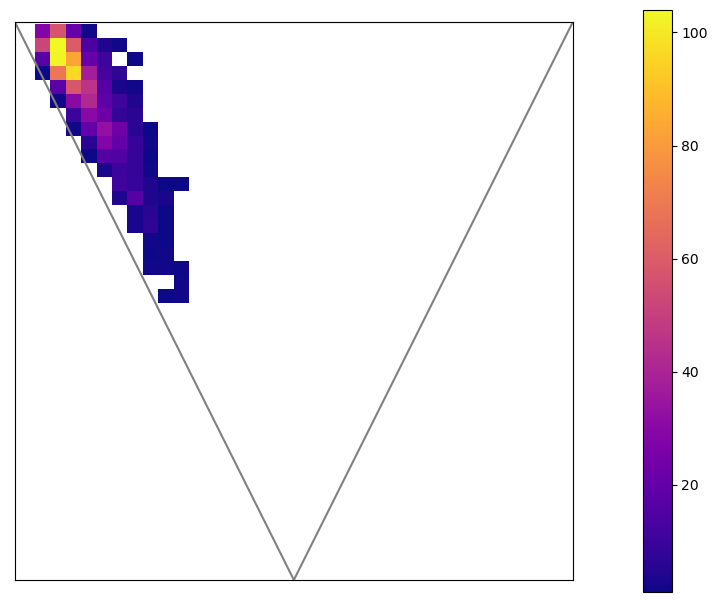

In [6]:
k=10
plot_pmi("./ac3drug_am3small/ac3drug_am3small_pmi.csv",n_bins=[k,k*2],save_name="./figures/ac3_ls_big.png")

### Reaction centers

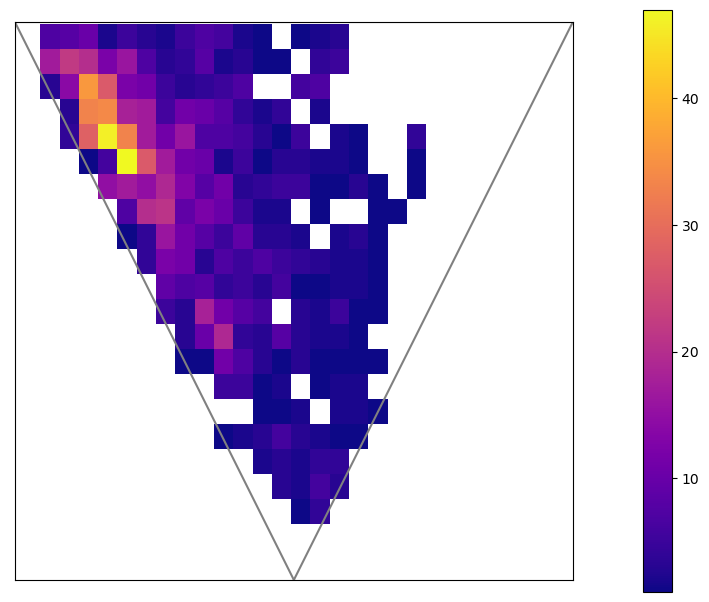

In [8]:
plot_pmi("./ac3drug_am3small/ac3drug_am3small_rxnctr_pmi.csv",n_bins=20,save_name="./figures/ac3_ls_small.png")